# Accessing and Modifying pixel values

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#預設值是1為彩色圖片，0為灰階圖
image = cv2.imread("D:/OpenCV/connected_component_labeling_pictures/1.png")
#可看到100,100位置的像素是各由BGR多少像素強度所組成
px = image[100,100]
print(px)
print(type(px))
#只看該像素位置的blue像素強度
blue = image[100,100,0]
print(blue)


[ 87 101  86]
<class 'numpy.ndarray'>
87


In [11]:
#Better pixel accessing and editing method 
px = image.item(10,10,2)
print(px)
image.itemset((10,10,2),100)
px1 = image.item(10,10,2)
print(px1)
#rows, columns and channels (if image is color)
print(image.shape)  #(533,800,3)
#if is gray return no channels
image1 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image1.shape)
print(image.size)
#image datatype.it's important
print(image.dtype)

100
100
(533, 800, 3)
(533, 800)
1279200
uint8


# Image ROI

In [12]:
#For eye detection in images, first face detection is done all over the image and when 
#face is obtained, we select the face region alone and search for eyes inside it
#instead of searching whole image. It improves accuracy (because eyes are always on faces :D )
#and performance (because we search for a small area)
cv2.rectangle(thresh,(270,430),(350,468),(0,255,0),2)
#塞一個車牌圖片到指定位置，但大小要一樣
carboard = thresh[430:468,270:350]
thresh[270:308,170:250] = carboard

In [6]:
#!!!!!!!!!cv2.split() is a costly operation (in terms of time). So do it only if you need it. Otherwise go for Numpy indexing
b,g,r = cv2.split(image)
print(b,g,r)
img = cv2.merge((b,g,r))
#numpy ndarray
print(type(img))

[[227 227 228 ..., 238 238 238]
 [228 228 228 ..., 238 238 238]
 [227 227 227 ..., 238 238 238]
 ..., 
 [ 40  39  37 ..., 104 105 103]
 [ 41  40  39 ..., 104 103 103]
 [ 42  40  38 ..., 104 103 102]] [[216 216 216 ..., 231 232 232]
 [217 216 217 ..., 232 232 232]
 [217 217 216 ..., 232 232 232]
 ..., 
 [ 41  41  40 ...,  99 101 101]
 [ 42  41  41 ..., 101 102 101]
 [ 42  42  41 ..., 102 101 100]] [[208 208 209 ..., 226 227 227]
 [209 209 209 ..., 227 227 227]
 [208 209 209 ..., 227 227 226]
 ..., 
 [ 32  32  31 ...,  91  91  91]
 [ 32  31  32 ...,  92  91  91]
 [ 32  32  31 ...,  94  91  90]]
<class 'numpy.ndarray'>


In [10]:

x = np.uint8([250])
y = np.uint8([10])
print( cv2.add(x,y) ) # 250+10 = 260 => 255
print(x+y) # 250+10 = 260 % 256 = 4

[[255]]
[4]


(533, 800, 3)
(480, 640, 3)
(480, 640, 3)


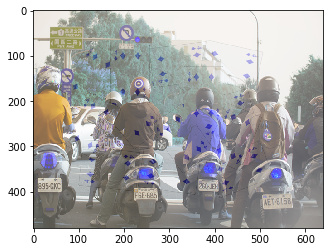

-1

In [15]:
from PIL import Image
image1 = cv2.imread("D:/PycharmProjects/test/OpenCVProject/OpenCV/connected_component_labeling_pictures/1.png")
image2 = cv2.imread("D:/PycharmProjects/test/OpenCVProject/OpenCV/connected_component_labeling_pictures/2.png")
# image3 = Image.open("D:/PycharmProjects/test/OpenCVProject/OpenCV/connected_component_labeling_pictures/1.png")
image3 = cv2.resize(image1,(640,480), interpolation = cv2.INTER_AREA)
print(image1.shape)
print(image2.shape)
print(image3.shape)
#dst=α*⋅img1+β*⋅img2+γ
dst = cv2.addWeighted(image3,0.7,image2,0.3,0)
plt.imshow(dst)
plt.show()
cv2.waitKey(0)

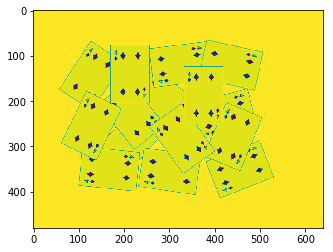

In [17]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = image2.shape
roi = image1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(img2gray)
# plt.imshow(mask)
plt.show()
mask_inv = cv2.bitwise_not(mask)

In [4]:
e1 = cv2.getTickCount()
# your code execution
e2 = cv2.getTickCount()
time = (e2 - e1)/ cv2.getTickFrequency()
print(e1,e2,time)

7098091808547 7098091808621 2.525866235585496e-05


In [14]:
label = [
    [0,0,0,0],
    [0,0,0,0],
    [3,3,4,3],
    [1,1,1,1],
    [1,1,1,2]
]
print(len(label))
print(np.unique(label))
for i,l in enumerate(label):
    print(i)
    print(l)


5
[0 1 2 3 4]
0
[0, 0, 0, 0]
1
[0, 0, 0, 0]
2
[3, 3, 4, 3]
3
[1, 1, 1, 1]
4
[1, 1, 1, 2]
